# Amazon Reviews Scraping

In [1]:
# Import packages
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_amazon_reviews(url, num_pages=100):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'
    }

    all_reviews = []

    for page in range(1, num_pages + 1):
        params = {
            'ie': 'UTF8',
            'reviewerType': 'all_reviews',
            'pageNumber': page,
        }

        response = requests.get(url + str(page), headers=headers, params=params)  # Append page number to the URL
        soup = BeautifulSoup(response.content, 'html.parser')  # Reinitialize soup for each page

        review_boxes = soup.select('div[data-hook="review"]')

        for box in review_boxes:
            name = box.select_one('[class="a-profile-name"]').text.strip()
            stars = box.select_one('[data-hook="review-star-rating"]').text.strip().split(' out')[0]
            title = box.select_one('[data-hook="review-title"]').text.strip()
            date = box.select_one('[data-hook="review-date"]').text.strip().split(' on ')[-1]
            description_elem = box.select_one('[data-hook="review-body"]')
            description = description_elem.text.strip() if description_elem else 'N/A'
            

            # Create a dictionary with review data
            data_dict = {
                'Name': name,
                'Stars': stars,
                'Title': title,
                'Date': date,
                'Description': description
            }

            all_reviews.append(data_dict)
            

    df_reviews = pd.DataFrame(all_reviews)
    return df_reviews

In [3]:
amazon_url = 'https://www.amazon.in/Noise-Launched-ColorFit-Training-Analysis/product-reviews/B0CFYNMFRF/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber='
reviews_df = get_amazon_reviews(amazon_url, num_pages=100)

reviews_df.to_csv('reviews.csv', index=False)

# Data Process


In [4]:
df_reviews=pd.read_csv(r"reviews.csv")
df_reviews.head(10)

,Name,Stars,Title,Date,Description
0,Keshav agarwal,5.0,5.0 out of 5 stars\nWatch,17 June 2024,The watch is amazing and I liked it The watch ...
1,Mustaque Ali Ansari,4.0,4.0 out of 5 stars\nValue for money and a nice...,3 February 2023,Bought this piece for a very peculiar reason. ...
2,I bought This watch and it arrived at the same...,5.0,5.0 out of 5 stars\nBest watch ever...,10 April 2024,Bought this piece for a very peculiar reason. ...
3,Harsha n.,5.0,5.0 out of 5 stars\nBest in class ever...,13 May 2024,- The screen has 60 hz refresh rate that reall...
4,Prasadh Laagad,4.0,4.0 out of 5 stars\nLooks Good!,20 June 2024,"Rectangular shape, good looks, quality of prod..."
5,Bharathwaj Kuppan,5.0,5.0 out of 5 stars\nBest Smartwatch in this se...,10 June 2024,I ordered Noise Colorfit Pro Max 5 and it got ...
6,Subhendu,3.0,3.0 out of 5 stars\nGood product,21 June 2024,Good product
7,AmzonCust,4.0,4.0 out of 5 stars\nThis is a good watch with ...,2 January 2024,"This is a good looking all ""bells and whistles..."
8,hisham Rahman,4.0,"4.0 out of 5 stars\n""ColorFit Pro 5 Max"": It's...",12 June 2024,Product is good. Nothing much to complain.Howe...
9,Abhinav,4.0,4.0 out of 5 stars\nSenseless sensors,20 June 2024,When you will connect your smartwatch on the ...


In [5]:
df_reviews.tail(10)

,Name,Stars,Title,Date,Description
90,Operating in mobile and watch is slow and desi...,4.0,4.0 out of 5 stars\nGood,1 April 2024,Yeah it's good 👍
91,BRIJ,5.0,"5.0 out of 5 stars\nJust received, looks great.",20 June 2024,Features and Designed in India..
92,Pramit,5.0,5.0 out of 5 stars\nVery nice,4 June 2024,Very nice
93,Kaushal Sheth,5.0,5.0 out of 5 stars\nExcellent product,11 June 2024,Excellent product
94,Ishwar Chandra singh,5.0,5.0 out of 5 stars\nGoooooood,20 June 2024,Good product..
95,Kani,4.0,4.0 out of 5 stars\nGood for the price,2 April 2024,It’s good to looks wear
96,Neha,5.0,5.0 out of 5 stars\nWorking good,9 June 2024,"The watch is good after 7 day review, nice int..."
97,Shubham Kumar,5.0,5.0 out of 5 stars\nGood product,16 June 2024,NaN
98,R Sarkar,5.0,5.0 out of 5 stars\nGood,17 June 2024,"Nice watch, durable"
99,Sarthak Gupta,5.0,5.0 out of 5 stars\nAmazing product,19 June 2024,😍😍


*Text Preprocessing*

In [6]:
df_reviews.describe()

,Stars
count,100.000000
mean,4.300000
std,0.611341
min,3.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         100 non-null    object 
 1   Stars        100 non-null    float64
 2   Title        100 non-null    object 
 3   Date         100 non-null    object 
 4   Description  95 non-null     object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


In [8]:
df_reviews.isna().sum()

Name           0
Stars          0
Title          0
Date           0
Description    5
dtype: int64

In [9]:
#df_reviews.duplicated().sum()

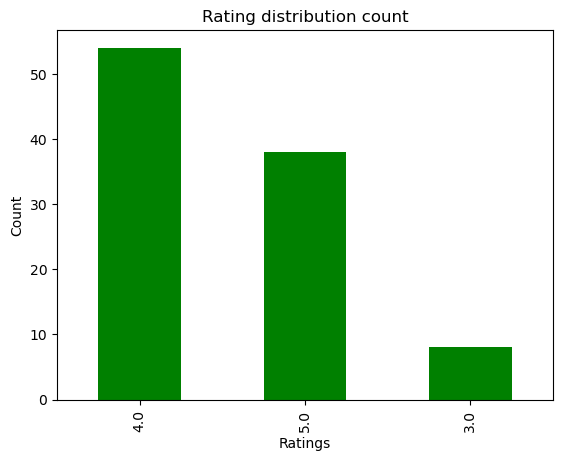

In [10]:
# Bar plot to visualize the total counts of each rating
import matplotlib.pyplot as plt
df_reviews['Stars'].value_counts().plot.bar(color='green')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

# # Finding the percentage distribution of each rating

In [11]:
percentage_distribution=round(df_reviews['Stars'].value_counts()/df_reviews.shape[0]*100,2)
percentage_distribution

4.0    54.0
5.0    38.0
3.0     8.0
Name: Stars, dtype: float64

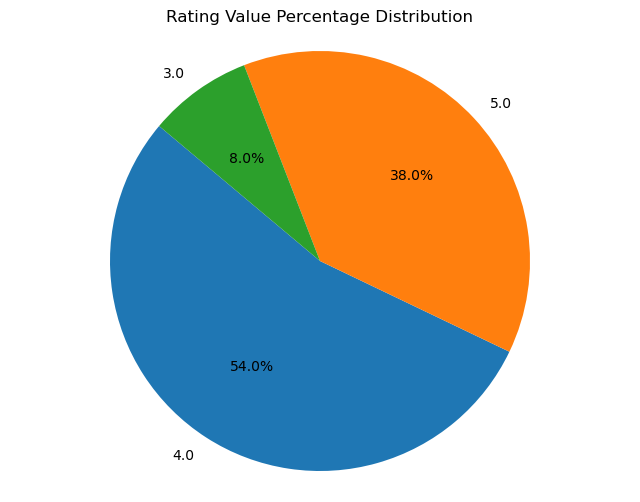

In [12]:
# Draw a pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Rating Value Percentage Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [13]:
df_reviews

,Name,Stars,Title,Date,Description
0,Keshav agarwal,5.0,5.0 out of 5 stars\nWatch,17 June 2024,The watch is amazing and I liked it The watch ...
1,Mustaque Ali Ansari,4.0,4.0 out of 5 stars\nValue for money and a nice...,3 February 2023,Bought this piece for a very peculiar reason. ...
2,I bought This watch and it arrived at the same...,5.0,5.0 out of 5 stars\nBest watch ever...,10 April 2024,Bought this piece for a very peculiar reason. ...
3,Harsha n.,5.0,5.0 out of 5 stars\nBest in class ever...,13 May 2024,- The screen has 60 hz refresh rate that reall...
4,Prasadh Laagad,4.0,4.0 out of 5 stars\nLooks Good!,20 June 2024,"Rectangular shape, good looks, quality of prod..."
...,...,...,...,...,...
95,Kani,4.0,4.0 out of 5 stars\nGood for the price,2 April 2024,It’s good to looks wear
96,Neha,5.0,5.0 out of 5 stars\nWorking good,9 June 2024,"The watch is good after 7 day review, nice int..."
97,Shubham Kumar,5.0,5.0 out of 5 stars\nGood product,16 June 2024,NaN
98,R Sarkar,5.0,5.0 out of 5 stars\nGood,17 June 2024,"Nice watch, durable"


# sentiment analysis

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from nltk.classify import NaiveBayesClassifier
from cleantext import clean

In [15]:
review_data=pd.read_csv(r"reviews.csv")
review_data

,Name,Stars,Title,Date,Description
0,Keshav agarwal,5.0,5.0 out of 5 stars\nWatch,17 June 2024,The watch is amazing and I liked it The watch ...
1,Mustaque Ali Ansari,4.0,4.0 out of 5 stars\nValue for money and a nice...,3 February 2023,Bought this piece for a very peculiar reason. ...
2,I bought This watch and it arrived at the same...,5.0,5.0 out of 5 stars\nBest watch ever...,10 April 2024,Bought this piece for a very peculiar reason. ...
3,Harsha n.,5.0,5.0 out of 5 stars\nBest in class ever...,13 May 2024,- The screen has 60 hz refresh rate that reall...
4,Prasadh Laagad,4.0,4.0 out of 5 stars\nLooks Good!,20 June 2024,"Rectangular shape, good looks, quality of prod..."
...,...,...,...,...,...
95,Kani,4.0,4.0 out of 5 stars\nGood for the price,2 April 2024,It’s good to looks wear
96,Neha,5.0,5.0 out of 5 stars\nWorking good,9 June 2024,"The watch is good after 7 day review, nice int..."
97,Shubham Kumar,5.0,5.0 out of 5 stars\nGood product,16 June 2024,NaN
98,R Sarkar,5.0,5.0 out of 5 stars\nGood,17 June 2024,"Nice watch, durable"


In [16]:
df=pd.DataFrame(review_data['Description'])
df

,Description
0,The watch is amazing and I liked it The watch ...
1,Bought this piece for a very peculiar reason. ...
2,Bought this piece for a very peculiar reason. ...
3,- The screen has 60 hz refresh rate that reall...
4,"Rectangular shape, good looks, quality of prod..."
...,...
95,It’s good to looks wear
96,"The watch is good after 7 day review, nice int..."
97,NaN
98,"Nice watch, durable"


# Removing emojies 

In [17]:
#!pip install emoji

In [18]:
import emoji

# Replace emojis with an empty string
df['Description'] = df['Description'].apply(lambda s: emoji.replace_emoji(str(s), '') if isinstance(s, str) else '')
df

,Description
0,The watch is amazing and I liked it The watch ...
1,Bought this piece for a very peculiar reason. ...
2,Bought this piece for a very peculiar reason. ...
3,- The screen has 60 hz refresh rate that reall...
4,"Rectangular shape, good looks, quality of prod..."
...,...
95,It’s good to looks wear
96,"The watch is good after 7 day review, nice int..."
97,
98,"Nice watch, durable"


In [19]:
# Convert all strings in the 'Description' column to lowercase
df['Description'] = df['Description'].str.lower()
df

,Description
0,the watch is amazing and i liked it the watch ...
1,bought this piece for a very peculiar reason. ...
2,bought this piece for a very peculiar reason. ...
3,- the screen has 60 hz refresh rate that reall...
4,"rectangular shape, good looks, quality of prod..."
...,...
95,it’s good to looks wear
96,"the watch is good after 7 day review, nice int..."
97,
98,"nice watch, durable"


# Using NLTK's Sentiment Intensity Analyzer

In [20]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [21]:
sentiments_using_SIA = df['Description'].apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Description
pos,90
neg,10


In [22]:
# Using TextBlob sentiment analyzer

In [23]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity > 0 else 'neg'

In [24]:
sentiments_using_textblob =df['Description'].apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Description
pos,80
neg,20


In [25]:
df['sentiment']=sentiments_using_textblob
df

,Description,sentiment
0,the watch is amazing and i liked it the watch ...,pos
1,bought this piece for a very peculiar reason. ...,pos
2,bought this piece for a very peculiar reason. ...,pos
3,- the screen has 60 hz refresh rate that reall...,pos
4,"rectangular shape, good looks, quality of prod...",pos
...,...,...
95,it’s good to looks wear,pos
96,"the watch is good after 7 day review, nice int...",pos
97,,neg
98,"nice watch, durable",pos


# Removing tweets with empty text

In [26]:
df = df[df['Description']!='']
df

,Description,sentiment
0,the watch is amazing and i liked it the watch ...,pos
1,bought this piece for a very peculiar reason. ...,pos
2,bought this piece for a very peculiar reason. ...,pos
3,- the screen has 60 hz refresh rate that reall...,pos
4,"rectangular shape, good looks, quality of prod...",pos
...,...,...
93,excellent product,pos
94,good product..,pos
95,it’s good to looks wear,pos
96,"the watch is good after 7 day review, nice int...",pos


In [27]:
# Dropping duplicate rows

In [28]:
df.drop_duplicates(subset=['Description'], keep=False)
df

,Description,sentiment
0,the watch is amazing and i liked it the watch ...,pos
1,bought this piece for a very peculiar reason. ...,pos
2,bought this piece for a very peculiar reason. ...,pos
3,- the screen has 60 hz refresh rate that reall...,pos
4,"rectangular shape, good looks, quality of prod...",pos
...,...,...
93,excellent product,pos
94,good product..,pos
95,it’s good to looks wear,pos
96,"the watch is good after 7 day review, nice int...",pos


# Removing Punctuations, Numbers and Special characters

In [29]:
df['Description'] = df['Description'].str.replace("[^a-zA-Z# ]", "")
df

,Description,sentiment
0,the watch is amazing and i liked it the watch ...,pos
1,bought this piece for a very peculiar reason n...,pos
2,bought this piece for a very peculiar reason n...,pos
3,the screen has hz refresh rate that really m...,pos
4,rectangular shape good looks quality of produc...,pos
...,...,...
93,excellent product,pos
94,good product,pos
95,its good to looks wear,pos
96,the watch is good after day review nice inter...,pos


In [30]:
# Removing Stop words

In [31]:
stopwords_set = set(stopwords.words('english'))
cleaned_reviews = []

for index, row in df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Description.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_reviews.append(' '.join(words_without_stopwords))
    
df['Description'] = cleaned_reviews
df

,Description,sentiment
0,watch amazing liked watch really loud enough b...,pos
1,bought piece peculiar reason needed watch remi...,pos
2,bought piece peculiar reason needed watch remi...,pos
3,screen hz refresh rate really makes responsive...,pos
4,rectangular shape good looks quality product h...,pos
...,...,...
93,excellent product,pos
94,good product,pos
95,good looks wear,pos
96,watch good day review nice interface backup da...,pos


[Text(0.5, 1.0, 'Distribution of reviews')]

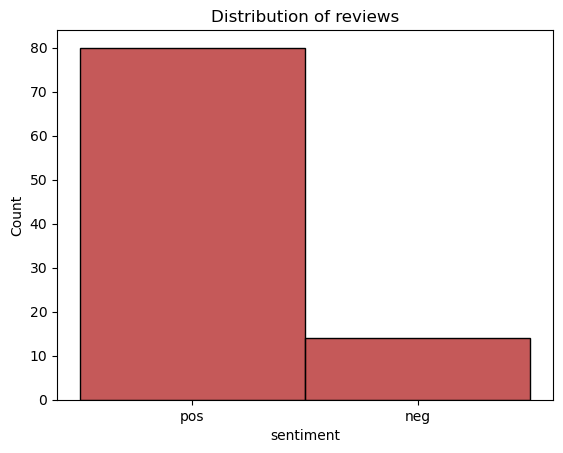

In [32]:
import seaborn as sns
sns.histplot(df['sentiment'],color='firebrick').set(title='Distribution of reviews')

# Tokenize
'''Tokenization is the process of dividing a continuous sequence of text (such as a sentence or paragraph) into smaller units called tokens.'''

In [33]:
tokenized_reviws = df['Description'].apply(lambda x: x.split())
tokenized_reviws

0     [watch, amazing, liked, watch, really, loud, e...
1     [bought, piece, peculiar, reason, needed, watc...
2     [bought, piece, peculiar, reason, needed, watc...
3     [screen, hz, refresh, rate, really, makes, res...
4     [rectangular, shape, good, looks, quality, pro...
                            ...                        
93                                 [excellent, product]
94                                      [good, product]
95                                  [good, looks, wear]
96    [watch, good, day, review, nice, interface, ba...
98                               [nice, watch, durable]
Name: Description, Length: 94, dtype: object

In [34]:
# Lemmatization
'''Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down 
to its root meaning (called a lemma or dictionary form).'''

'Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down \nto its root meaning (called a lemma or dictionary form).'

In [35]:
word_lemmatizer = WordNetLemmatizer()

In [36]:
tokenized_reviws = tokenized_reviws.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_reviws

0     [watch, amazing, liked, watch, really, loud, e...
1     [bought, piece, peculiar, reason, needed, watc...
2     [bought, piece, peculiar, reason, needed, watc...
3     [screen, hz, refresh, rate, really, make, resp...
4     [rectangular, shape, good, look, quality, prod...
                            ...                        
93                                 [excellent, product]
94                                      [good, product]
95                                   [good, look, wear]
96    [watch, good, day, review, nice, interface, ba...
98                               [nice, watch, durable]
Name: Description, Length: 94, dtype: object

# Joining all tokens into sentences

In [37]:
for i, tokens in enumerate(tokenized_reviws):
    tokenized_reviws[i] = ' '.join(tokens)

df['Description'] = tokenized_reviws
df

,Description,sentiment
0,watch amazing liked watch really loud enough b...,pos
1,bought piece peculiar reason needed watch remi...,pos
2,bought piece peculiar reason needed watch remi...,pos
3,screen hz refresh rate really make responsive ...,pos
4,rectangular shape good look quality product ha...,pos
...,...,...
93,nice watch durable,pos
94,"[good, product]",pos
95,"[good, look, wear]",pos
96,"[watch, good, day, review, nice, interface, ba...",pos


In [99]:
df[df['sentiment'] == 'neg']

,Description,sentiment
10,value money lil dial design inbuilt,neg
12,still could install yhe pdoduct showing error,neg
14,bluetooth calling upto mark,neg
18,neat display look upmarket vital reading like ...,neg
34,like quality product,neg
37,display comfort,neg
38,received todayok price give review using,neg
45,,neg
55,doesnt give average timing falling asleep wake...,neg
65,used day issue battery drain u used feature de...,neg


In [38]:
# WordCloud

In [39]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [40]:
# Most common words in positive tweets

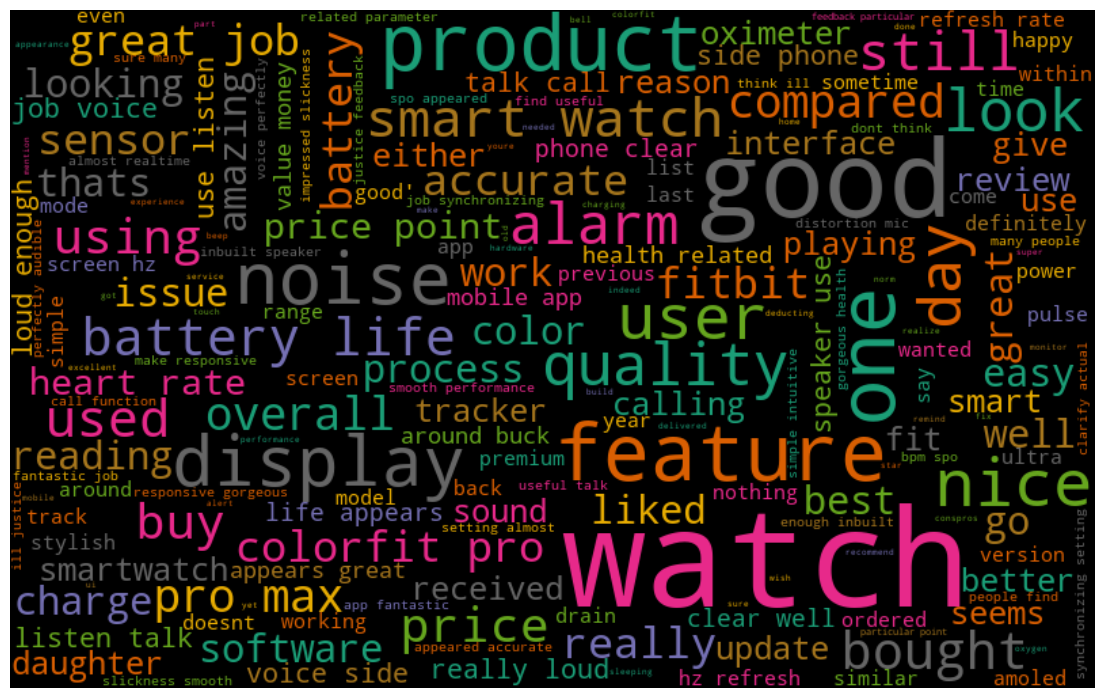

In [41]:
# Filter positive sentiment descriptions and convert them to strings
positive_descriptions = [str(text) for text in df['Description'][df.sentiment == 'pos']]

# Join the positive descriptions
all_words = ' '.join(positive_descriptions)

# Now you can proceed with generating the word cloud
generate_wordcloud(all_words)

In [42]:
# Most common words in negative tweets

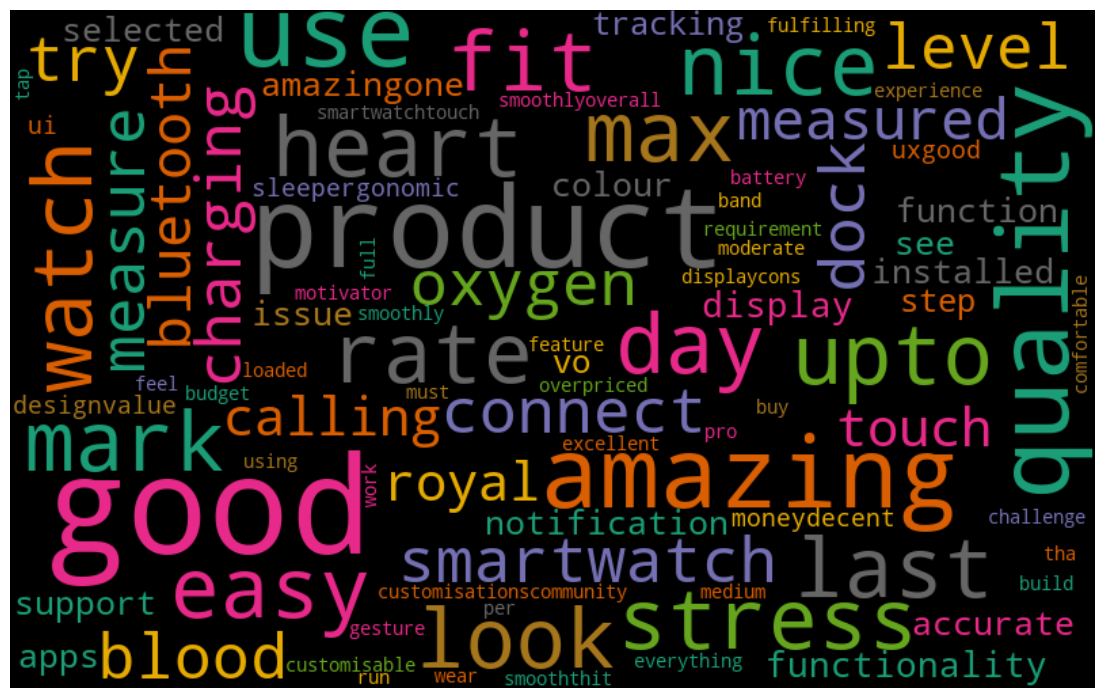

In [43]:
all_words = ' '.join([text for text in df['Description'][df['sentiment'] == 'neg']])
generate_wordcloud(all_words)

simple way to extract key phrases, by using TextBlob (ConllExtractor)

# Feature Extraction
We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

Bag of words (Simple vectorization)
TF-IDF (Term Frequency - Inverse Document Frequency)
We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.

In [44]:
df['Description'] = [str(desc) for desc in df['Description']]

In [45]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(df['Description'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(df['Description'])

# Model Building: Sentiment Analysis

# Map target variables to {0, 1}

In [46]:
y= df['sentiment'].apply(lambda x: 0 if x=='neg' else 1)

# Model Building using TF-IDF 

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(tfidf_word_feature,y,test_size=0.3,random_state=15)

In [56]:
# Check class distribution
print(pd.Series(ytrain).value_counts())
print(pd.Series(ytest).value_counts())


1    58
0     7
Name: sentiment, dtype: int64
1    22
0     7
Name: sentiment, dtype: int64


In [57]:
#Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(xtrain,ytrain)

# predictions over test set
predictions =model_lr.predict(xtest)
print("Training Accuracy:",model_lr.score(xtrain,ytrain))
print("Testing Accuracy:",model_lr.score(xtest,ytest))

Training Accuracy: 0.8923076923076924
Testing Accuracy: 0.7586206896551724


In [58]:
cm=confusion_matrix(ytest,predictions)
print(cm)

[[ 0  7]
 [ 0 22]]


In [59]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.76      1.00      0.86        22

    accuracy                           0.76        29
   macro avg       0.38      0.50      0.43        29
weighted avg       0.58      0.76      0.65        29



In [60]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Note: 'elasticnet' is only supported by 'saga' solver
    'solver': ['lbfgs', 'liblinear', 'saga']  # 'lbfgs' and 'liblinear' are commonly used solvers
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [61]:
# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator found by GridSearchCV for predictions
best_model_lr = grid_search.best_estimator_


Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [62]:
model_lr = LogisticRegression(C= 0.01, penalty ='l1', solver= 'saga')
model_lr.fit(xtrain,ytrain)

# Predictions over the test set
predictions = best_model_lr.predict(xtest)

# Evaluate model performance
print("Training Accuracy:", best_model_lr.score(xtrain, ytrain))
print("Testing Accuracy:", best_model_lr.score(xtest, ytest))


Training Accuracy: 0.8923076923076924
Testing Accuracy: 0.7586206896551724


In [63]:
#Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)

# predictions over test set
predictions =model_dt.predict(xtest)
print("Training Accuracy:",model_dt.score(xtrain,ytrain))
print("Testing Accuracy:",model_dt.score(xtest,ytest))

Training Accuracy: 0.9846153846153847
Testing Accuracy: 0.6896551724137931


In [64]:
cm=confusion_matrix(ytest,predictions)
print(cm)

[[ 0  7]
 [ 2 20]]


In [65]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.74      0.91      0.82        22

    accuracy                           0.69        29
   macro avg       0.37      0.45      0.41        29
weighted avg       0.56      0.69      0.62        29



In [66]:
param_grid = {
    'criterion': ['gini', 'entropy'],       # Criterion to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50], # Maximum depth of the tree
    'min_samples_split': [2, 10, 20, 30],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 5, 10, 15],     # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model_dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 10, 20, 30]},
             scoring='accuracy')

In [67]:
# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator found by GridSearchCV for predictions
best_model_dt = grid_search.best_estimator_

Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [68]:
model_dt = DecisionTreeClassifier(criterion= 'gini', max_depth=10, max_features='log2', min_samples_leaf=1, min_samples_split=20)
model_dt.fit(xtrain,ytrain)
predictions = best_model_dt.predict(xtest)

# Evaluate model performance
print("Training Accuracy:", best_model_dt.score(xtrain, ytrain))
print("Testing Accuracy:", best_model_dt.score(xtest, ytest))

Training Accuracy: 0.9692307692307692
Testing Accuracy: 0.7586206896551724


In [69]:
# Random Forest
model_rf=RandomForestClassifier()
model_rf.fit(xtrain,ytrain)

# predictions over test set
predictions =model_rf.predict(xtest)
print("Training Accuracy:",model_rf.score(xtrain,ytrain))
print("Testing Accuracy:",model_rf.score(xtest,ytest))

Training Accuracy: 0.9846153846153847
Testing Accuracy: 0.7586206896551724


In [70]:
cm=confusion_matrix(ytest,predictions)
print(cm)

[[ 0  7]
 [ 0 22]]


In [71]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.76      1.00      0.86        22

    accuracy                           0.76        29
   macro avg       0.38      0.50      0.43        29
weighted avg       0.58      0.76      0.65        29



In [72]:
# Naive_bayes

In [73]:
naive_classifier = GaussianNB()
naive_classifier.fit(xtrain.toarray(), ytrain)

# predictions over test set
predictions = naive_classifier.predict(xtest.toarray())
print("Training Accuracy:",naive_classifier.score(xtrain.toarray(),ytrain))
print("Testing Accuracy:",naive_classifier.score(xtest.toarray(),ytest))

Training Accuracy: 0.8769230769230769
Testing Accuracy: 0.5862068965517241


In [74]:
cm=confusion_matrix(ytest,predictions)
print(cm)

[[ 1  6]
 [ 6 16]]


In [75]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.14      0.14      0.14         7
           1       0.73      0.73      0.73        22

    accuracy                           0.59        29
   macro avg       0.44      0.44      0.44        29
weighted avg       0.59      0.59      0.59        29



In [76]:

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Grid search using cross-validation with 5-fold (adjust cv as needed)
grid_search = GridSearchCV(naive_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to find the best parameters
grid_search.fit(xtrain.toarray(), ytrain)


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [77]:
# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator found by GridSearchCV for predictions
best_naive_classifier = grid_search.best_estimator_


Best Parameters: {'var_smoothing': 1e-09}


In [78]:
naive_classifier = GaussianNB(var_smoothing= 1e-09)
naive_classifier.fit(xtrain.toarray(), ytrain)
# predictions over test set
predictions = best_naive_classifier.predict(xtest.toarray())

# Evaluate model performance
print("Training Accuracy:", best_naive_classifier.score(xtrain.toarray(),ytrain))
print("Testing Accuracy:", best_naive_classifier.score(xtest.toarray(), ytest))

Training Accuracy: 0.8769230769230769
Testing Accuracy: 0.5862068965517241


In [79]:
#GB
model_gb=GradientBoostingClassifier()
model_gb.fit(xtrain,ytrain)
predictions =model_gb.predict(xtest)
print("Training Accuracy:",model_gb.score(xtrain,ytrain))
print("Testing Accuracy:",model_gb.score(xtest,ytest))

Training Accuracy: 0.9846153846153847
Testing Accuracy: 0.7586206896551724


In [80]:
cm=confusion_matrix(ytest,predictions)
print(cm)

[[ 0  7]
 [ 0 22]]


In [81]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.76      1.00      0.86        22

    accuracy                           0.76        29
   macro avg       0.38      0.50      0.43        29
weighted avg       0.58      0.76      0.65        29



In [82]:
params = {
    'n_estimators' : [90,110,150,200],
    'learning_rate' : [0.5,0.6,0.7,0.9,1],
    'max_depth' : [3,5,7,11]
}
grid = GridSearchCV(GradientBoostingClassifier(), params, verbose=1)

grid.fit(xtrain,ytrain)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.5, 0.6, 0.7, 0.9, 1],
                         'max_depth': [3, 5, 7, 11],
                         'n_estimators': [90, 110, 150, 200]},
             verbose=1)

In [83]:
grid.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 90}

In [84]:
model_gb=GradientBoostingClassifier(learning_rate=0.6, max_depth=5, n_estimators=110)
model_gb.fit(xtrain,ytrain)
predictions =model_gb.predict(xtest)
print("Training Accuracy:",model_gb.score(xtrain,ytrain))
print("Testing Accuracy:",model_gb.score(xtest,ytest))

Training Accuracy: 0.9846153846153847
Testing Accuracy: 0.7586206896551724


In [85]:
#XGBOOST
model_xgb=XGBClassifier()
model_xgb.fit(xtrain,ytrain)
predictions =model_xgb.predict(xtest)
print("Training Accuracy:",model_xgb.score(xtrain,ytrain))
print("Testing Accuracy:",model_xgb.score(xtest,ytest))

Training Accuracy: 0.9538461538461539
Testing Accuracy: 0.7586206896551724


In [86]:
cm=confusion_matrix(ytest,predictions)
print(cm)

[[ 0  7]
 [ 0 22]]


In [87]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.76      1.00      0.86        22

    accuracy                           0.76        29
   macro avg       0.38      0.50      0.43        29
weighted avg       0.58      0.76      0.65        29



In [88]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model_xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [89]:
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator found by GridSearchCV for predictions
best_model_xgb = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [90]:
model_xgb=XGBClassifier(learning_rate= 0.05, max_depth= 3, n_estimators=200)
model_xgb.fit(xtrain,ytrain)
predictions = best_model_xgb.predict(xtest)

# Evaluate model performance
print("Training Accuracy:", best_model_xgb.score(xtrain, ytrain))
print("Testing Accuracy:", best_model_xgb.score(xtest, ytest))

Training Accuracy: 0.8923076923076924
Testing Accuracy: 0.7586206896551724


In [91]:
#svc
model_svc=SVC()
model_svc.fit(xtrain,ytrain)
predictions =model_xgb.predict(xtest)
print("Training Accuracy:",model_svc.score(xtrain,ytrain))
print("Testing Accuracy:",model_svc.score(xtest,ytest))

Training Accuracy: 0.8923076923076924
Testing Accuracy: 0.7586206896551724


In [92]:
cm=confusion_matrix(ytest,predictions)
print(cm)

[[ 0  7]
 [ 0 22]]


In [93]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.76      1.00      0.86        22

    accuracy                           0.76        29
   macro avg       0.38      0.50      0.43        29
weighted avg       0.58      0.76      0.65        29



In [94]:
from sklearn.model_selection import GridSearchCV
param = {
    'kernel' : ['linear','rbf','poly']
}
grid = GridSearchCV(SVC(), param_grid= param, verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=SVC(), param_grid={'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [95]:
grid.best_params_

{'kernel': 'linear'}

In [96]:
model_svc=SVC(kernel='linear')
model_svc.fit(xtrain,ytrain)
predictions =model_xgb.predict(xtest)
print("Training Accuracy:",model_svc.score(xtrain,ytrain))
print("Testing Accuracy:",model_svc.score(xtest,ytest))

Training Accuracy: 0.8923076923076924
Testing Accuracy: 0.7586206896551724


In [97]:
models = {"Logistic Regression" : LogisticRegression(),"Decision Tree": DecisionTreeClassifier(),"Random Forest": RandomForestClassifier(),"naive classifier": GaussianNB(),"Gradient Boosting": GradientBoostingClassifier(),"Support Vector Classifier": SVC(),"Xtreme Gradient Boosting":XGBClassifier()}
results = []
for name, model in models.items():
    model.fit(xtrain.toarray(), ytrain) 
    predictions = model.predict(xtest.toarray())
    Train_Accuracy = model.score(xtrain.toarray(), ytrain)
    Test_Accuracy = model.score(xtest.toarray() ,ytest)
    cm=confusion_matrix(ytest,predictions)
    results.append({"Regressor MODEL": name, "Train Acc": Train_Accuracy, "Test Acc":Test_Accuracy,"Confusion Matrix": cm})
models_df = pd.DataFrame(results)
models_df.sort_values(by=["Train Acc","Test Acc"], ascending=False)

,Regressor MODEL,Train Acc,Test Acc,Confusion Matrix
1,Decision Tree,0.984615,0.758621,"[[0, 7], [0, 22]]"
2,Random Forest,0.984615,0.758621,"[[0, 7], [0, 22]]"
4,Gradient Boosting,0.984615,0.758621,"[[0, 7], [0, 22]]"
6,Xtreme Gradient Boosting,0.923077,0.758621,"[[0, 7], [0, 22]]"
0,Logistic Regression,0.892308,0.758621,"[[0, 7], [0, 22]]"
5,Support Vector Classifier,0.892308,0.758621,"[[0, 7], [0, 22]]"
3,naive classifier,0.876923,0.586207,"[[1, 6], [6, 16]]"


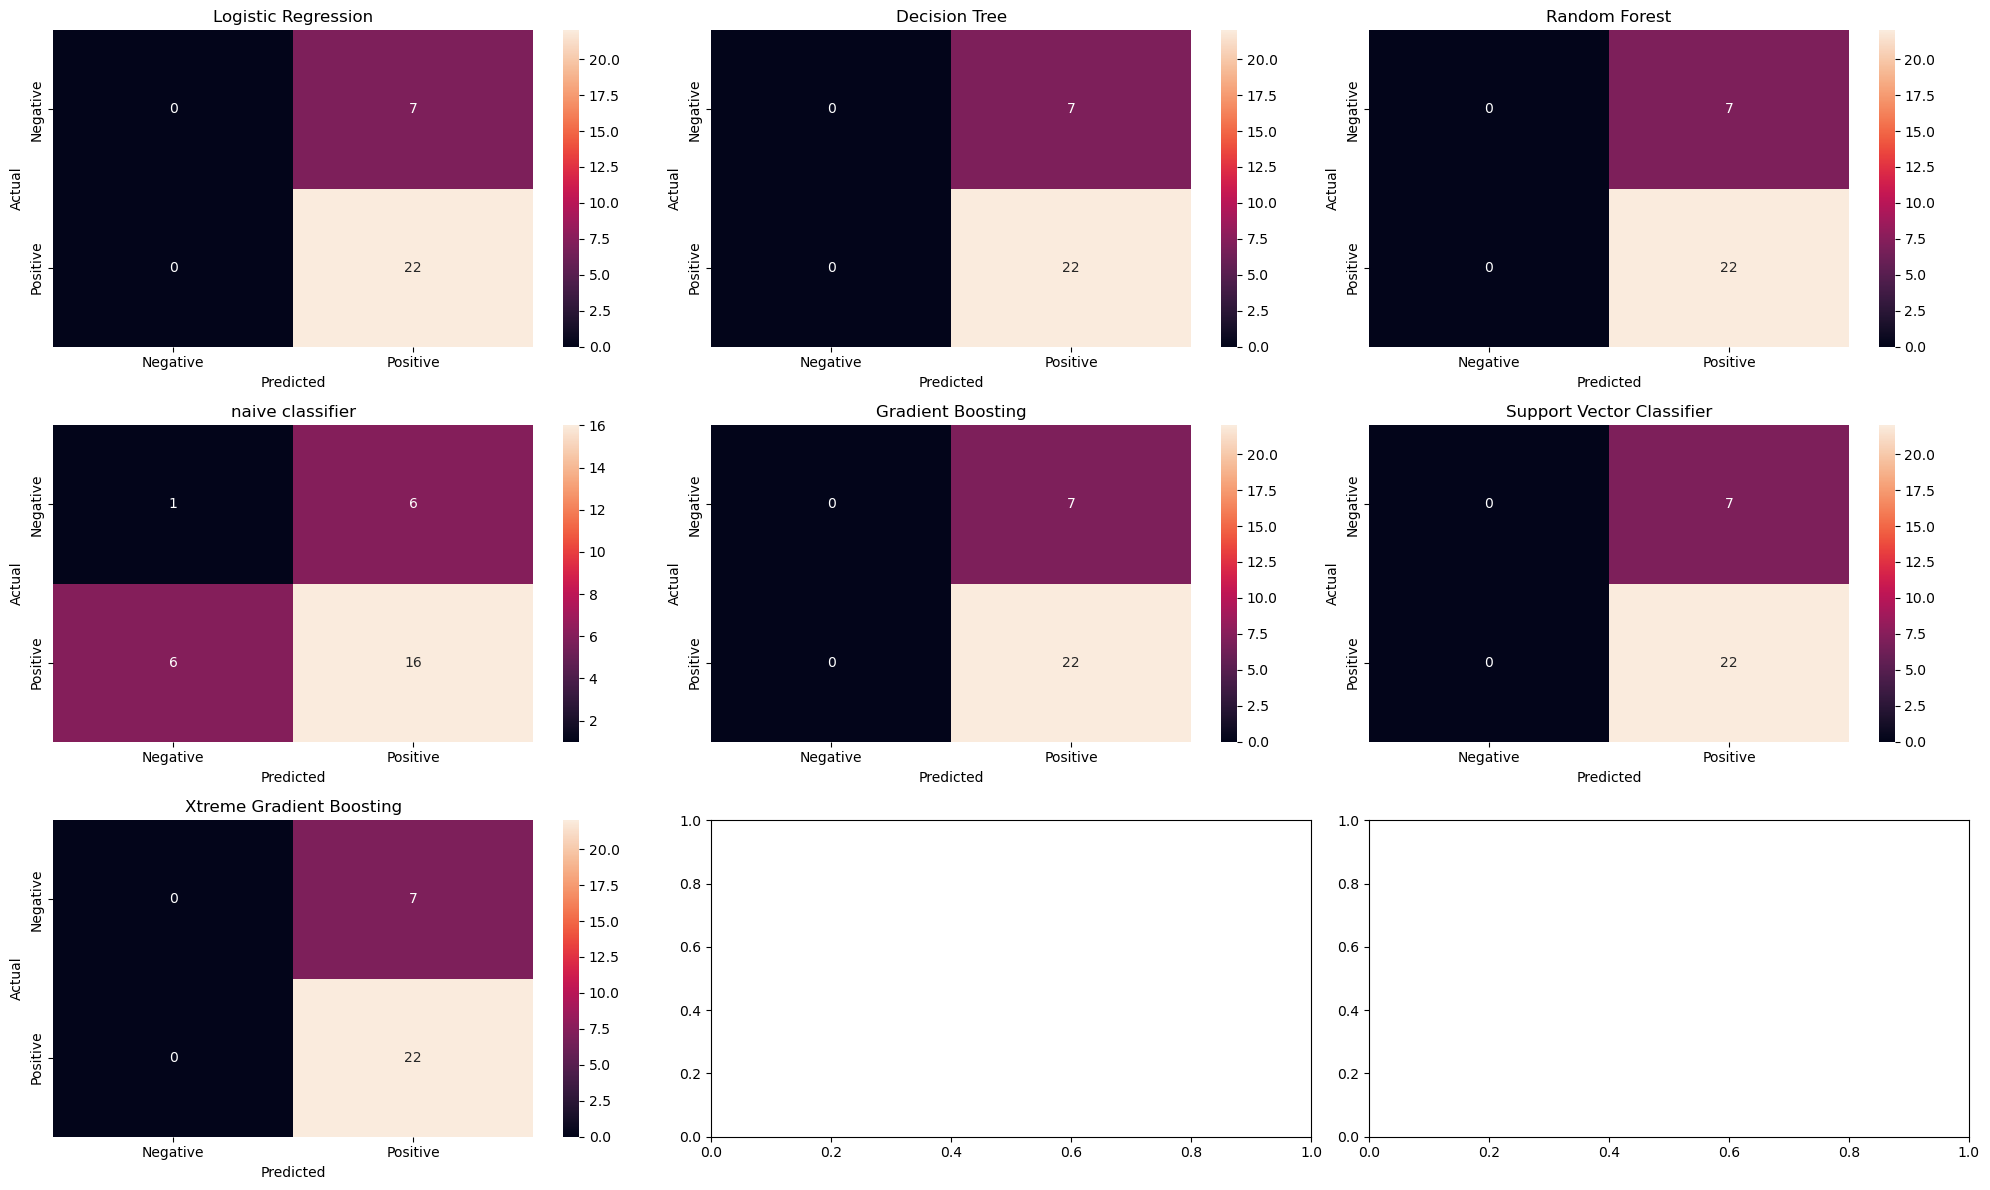

In [98]:
# Function to plot confusion matrix
def plot_confusion_matrix(ax, cm, labels, title):
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title(title)

# Create subplots for confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))

# Plot each confusion matrix
for i, result in enumerate(results):
    row = i // 3
    col = i % 3
    model_name = result["Regressor MODEL"]
    cm = result["Confusion Matrix"]
    plot_confusion_matrix(axes[row, col], cm, labels=['Negative', 'Positive'], title=model_name)

plt.tight_layout()
plt.show()


In [99]:
# we can use logistic regression for deployment

# Deployment

In [100]:
import pickle

In [102]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import pickle

# Assuming you have the dataframe `df` with columns 'Description' and 'sentiment'
# Example dataframe creation for demonstration purposes
# df = pd.DataFrame({'Description': ['I love this product', 'This is terrible', 'Not bad', 'Excellent service'],
#                    'sentiment': ['pos', 'neg', 'pos', 'pos']})

x = df['Description']
y = df['sentiment'].apply(lambda x: 0 if x == 'neg' else 1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

# Create the pipeline with TF-IDF vectorizer and logistic regression model
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', LogisticRegression())
])

# Train the model with your data
model.fit(xtrain, ytrain)

# Save the model to a pickle file
pickle_out = open('model.pkl', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()
print("Model saved successfully")

# Optionally, you can load the model back to verify
# with open('model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)
#     print("Model loaded successfully")


Model saved successfully
